<a href="https://colab.research.google.com/github/pablillo77/data_science_1/blob/main/ProyectoDS_ParteI_Gimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

---

**Título: Exploración preliminar del dataset de Kaggle sobre Diabetes, basado en "Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females" para comprender la distribución y relaciones en un conjunto de datos multidimensional**

**Resumen:**
Este estudio presenta una exploración preliminar de un dataset multidimensional basado en información del National Institute of Diabetes and Digestive and Kidney Diseases.El objetivo es comprender su estructura, distribución y posibles relaciones entre variables. Se utilizó un enfoque de análisis descriptivo y visualización de datos para examinar un conjunto de datos compuesto por información de parámetros que pueden incidir o no en el desarrollo de Diabetes, una funcion de scoring y un Outcome (Diabetes/No diabetes). Inicialmente, se realizó una exploración de la estructura del dataset, revelando un total de 768 observaciones y 9 variables. Luego, se calcularon estadísticas descriptivas para cada variable, proporcionando información sobre la media, mediana, desviación estándar y valores extremos.

Además, se llevaron a cabo visualizaciones univariadas y multivariadas para explorar la distribución de variables individuales y las relaciones entre pares de variables. Se identificaron [número de valores atípicos] valores atípicos en el dataset, los cuales serán objeto de un análisis más detallado en investigaciones posteriores. Se observaron también relaciones significativas entre ciertas variables, como se evidenció en la matriz de correlación y en las visualizaciones de datos multivariados.

En conjunto, estos resultados preliminares proporcionan una comprensión inicial de la estructura y la naturaleza de los datos, lo que servirá como base para análisis más avanzados y la construcción de modelos predictivos en investigaciones futuras.

---

Este abstract ofrece una visión general de los pasos y resultados clave obtenidos durante la exploración preliminar del dataset, lo que permite a los lectores comprender rápidamente la naturaleza y el alcance del estudio.

Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf

# Importamos las librerias que utilizaremos

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [3]:
mpl.style.use('ggplot')

In [4]:
url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url)


# A continuación se agregan las definiciones de los campos:
Pregnancies: Expresa la cantidad de embarazos

Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

BloodPressure: Presión diastólica en mmHg

SkinThickness: Espesor de la piel en el ticeps en mm

Insulin: Nivel de insulina en sangre en uU/ml

BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

## Preguntas e hiótesis inciales
* 1) Estudiar la relación entre las variables, por ejemplo entre Insulina y
Glucosa. La insulina es la hormona que permite que la glucosa en sagre entre a las células, cuando la persona presenta glucemia elevada de manera anormal, valores anormalmente altos de insulina en ayunas (>25 uU/ml) pueden indicar resistencia a la insulina y aumenta las chances de desarrollar diabetes de tipo 2. Si la glucemia es elevada pero la insulina no, puede ser una indicación de qu el páncreas ya no alcanza a compensarlo y se puede desarrollar diabetes de tipo 1.

* 2) Investigar y ampliar correlaciones con las otras variables del dataset. El indice de masa corporal BMI, suele ser un predictor de sindrome metabólico y puede aumentar las chances de desarrollar diabetes.

* 3) Investigar a futuro si se encuentran correlaciones fuertes entre las variables, si existe redundancia y si es factible aplicar algún método para reducir la dimensionalidad del dataset como PCA y quedarnos con combinaciones que expresen la maxima variabilidad de los datos.

#Estructura y resumen estadístico

In [40]:
print("Las columnas del dataset son: ")
df.columns

Las columnas del dataset son: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print("Las dimensiones del dataset son: ")
df.shape


Las dimensiones del dataset son: 


(768, 9)

## Análisis de datos faltantes. Se evidencian valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procede a reemplazarlos por NaN para su posterior análisis.

In [5]:
df_nan = df.copy(deep=True) #creo una copia para mantener el original
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan)



In [6]:
print(df_nan.isna().sum()) #valores con su conteo de NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
# Calcular el coeficiente de variación para la glucosa y la insulina
coef_var = (df_nan["Glucose"].std() / df_nan['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df_nan["Insulin"].std() / df_nan['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df_nan["SkinThickness"].std() / df_nan['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df_nan["BMI"].std() / df_nan['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)
coef_var = (df_nan["BloodPressure"].std() / df_nan['BloodPressure'].mean() *100).round(2)
print("El coeficiente de variación para la BloodPressure es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34
El coeficiente de variación para la BloodPressure es:
 17.1


## Entendemos que de los valores con datos faltantes, Glucose, BMI y BloodPressure presentan una distribución simétrica. Se utilizará entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

In [8]:
df_nan["Glucose"].fillna(df_nan["Glucose"].mean(), inplace=True)
df_nan["BloodPressure"].fillna(df_nan["BloodPressure"].mean(), inplace=True)
df_nan["BMI"].fillna(df_nan["BMI"].mean(), inplace=True)
print(df_nan.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
df_nan=df_nan.dropna()
print(df_nan.isna().sum())
df_nan.shape #verifico que quedamos ahora con 394 filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(394, 9)

In [10]:
df_diabeticos = df_nan[df_nan["Outcome"] == 1] #creo un subdataset de los pacientes que tienen como Outcome 1, diabéticos.
df_diabeticos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24,1
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48,1
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


##Graficos con matplotlib univariados

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

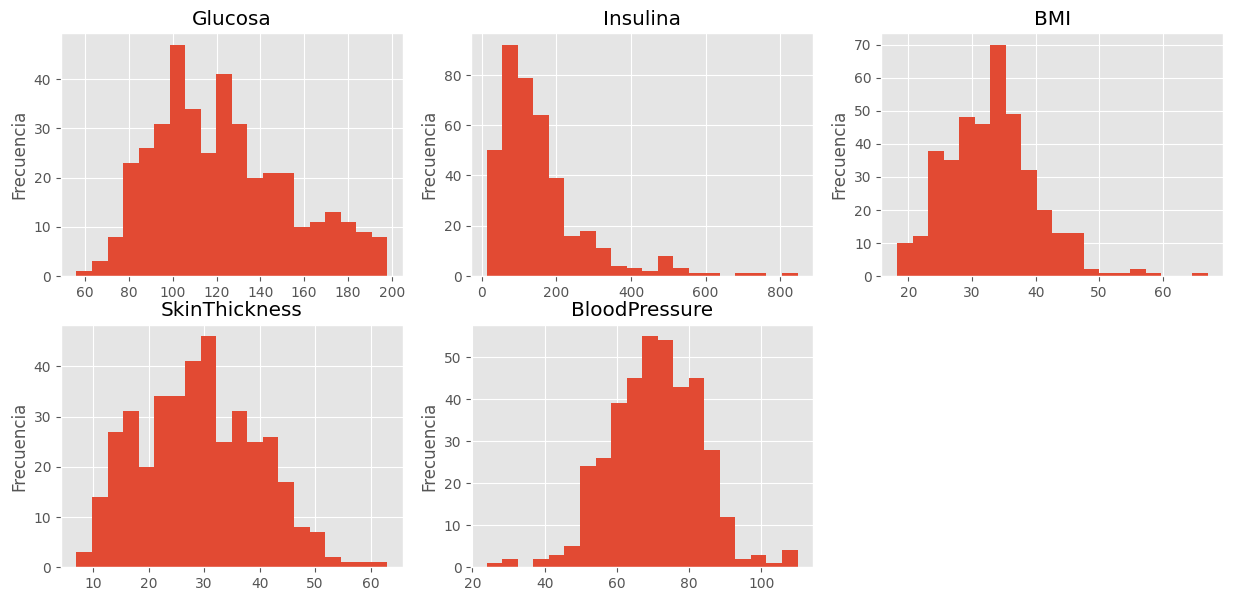

In [11]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_nan['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_nan['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_nan['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_nan['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_nan['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Glucose, BMI y BloodPressure presentan una distribución relativamente simétrica, consistente con los resulatados de los coeficientes de variación. Se aprecian valores de insulina muy elevados, que no se condicen en principio con valores fisiológicos (se intentará buscar más información)

## Graficos con matplotlib univariados del sub-dataset df_diabéticos.

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

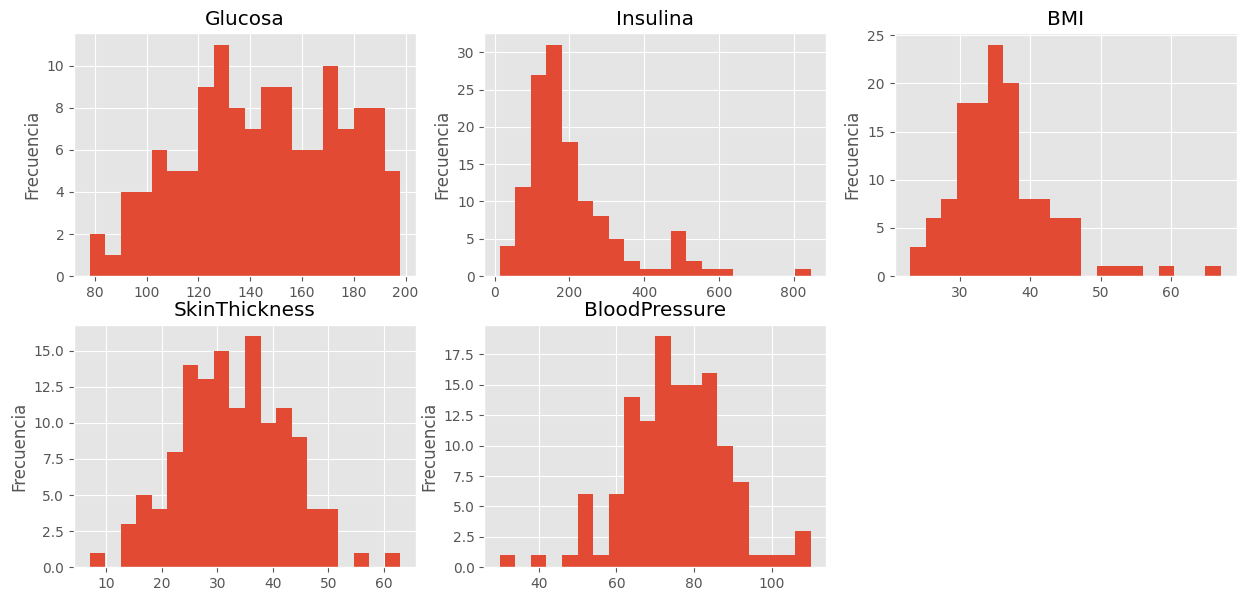

In [12]:
plt.figure(figsize=(15,6)) #realizo los mismos plots pero solo para los diabeticos, con el fin de ver tendencias y corrimientos.
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_diabeticos['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_diabeticos['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_diabeticos['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_diabeticos['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_diabeticos['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Se aprecia un corrimiento de las distribuciones hacia valores más altos, en glucosa,insulina y skinthickness principalmente.

## Análisis de correlación dataset total

<Axes: >

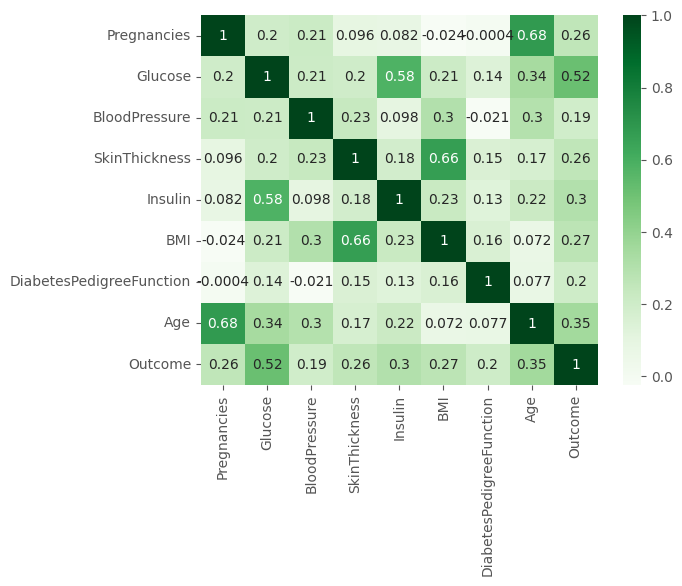

In [13]:
matrix = df_nan.corr() #total

sns.heatmap(matrix, cmap="Greens", annot=True)

Se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age. No se observa una relación marcada entre la funcion DiabetesPedigree y el Outcome.

## Visualización de datos multivariados

Text(0, 0.5, 'Insulina (uU/ml)')

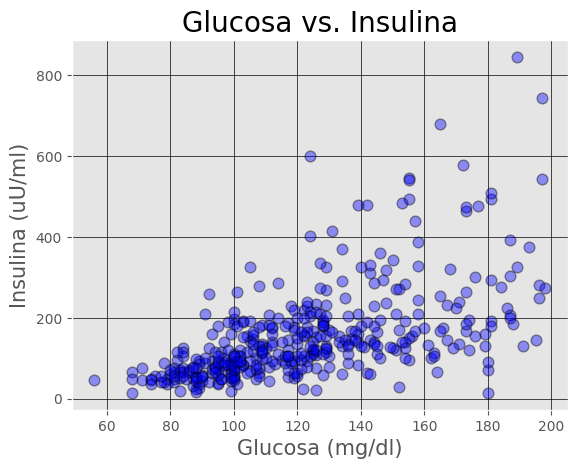

In [14]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["Glucose"], df_nan["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k")
ax.set_title('Glucosa vs. Insulina', fontsize=20)
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


Text(0, 0.5, 'BMI')

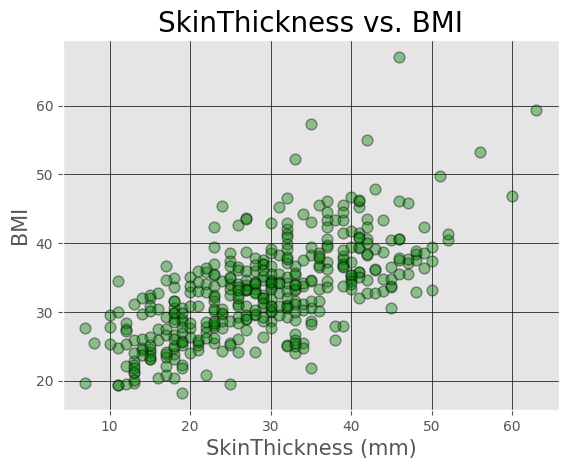

In [15]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["SkinThickness"], df_nan["BMI"], alpha=0.4, facecolor="green", linewidths=1, s=60, edgecolor="k")
ax.set_title('SkinThickness vs. BMI', fontsize=20)
ax.set_xlabel('SkinThickness (mm)', fontsize=15)
ax.set_ylabel('BMI', fontsize=15)

## De acuerdo al "Outcome" realizaré un recuento para un gráfico de barras utilizandolo como variable categórica:

Outcome
0    264
1    130
Name: count, dtype: int64

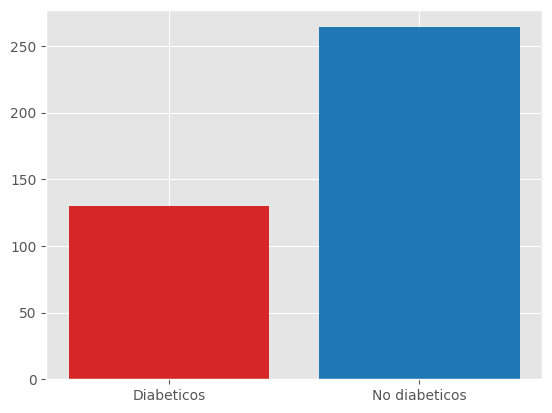

In [16]:
df_nan["Pregnancies"]=df_nan["Pregnancies"].astype('category') #redefino los tipos de Pregnancies y Outcome como categóricas.
df_nan.Outcome=df_nan.Outcome.astype('category')

fig, ax = plt.subplots()
counts = [df_nan['Outcome'].value_counts()[1], df_nan["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors)
df_nan['Outcome'].value_counts()


In [17]:
df_nan.describe(include='category')

,Pregnancies,Outcome
count,394,394
unique,17,2
top,1,0
freq,94,264


## Realizo los mismos histogramas de Glucosa e Insulina pero utilizando seaborn

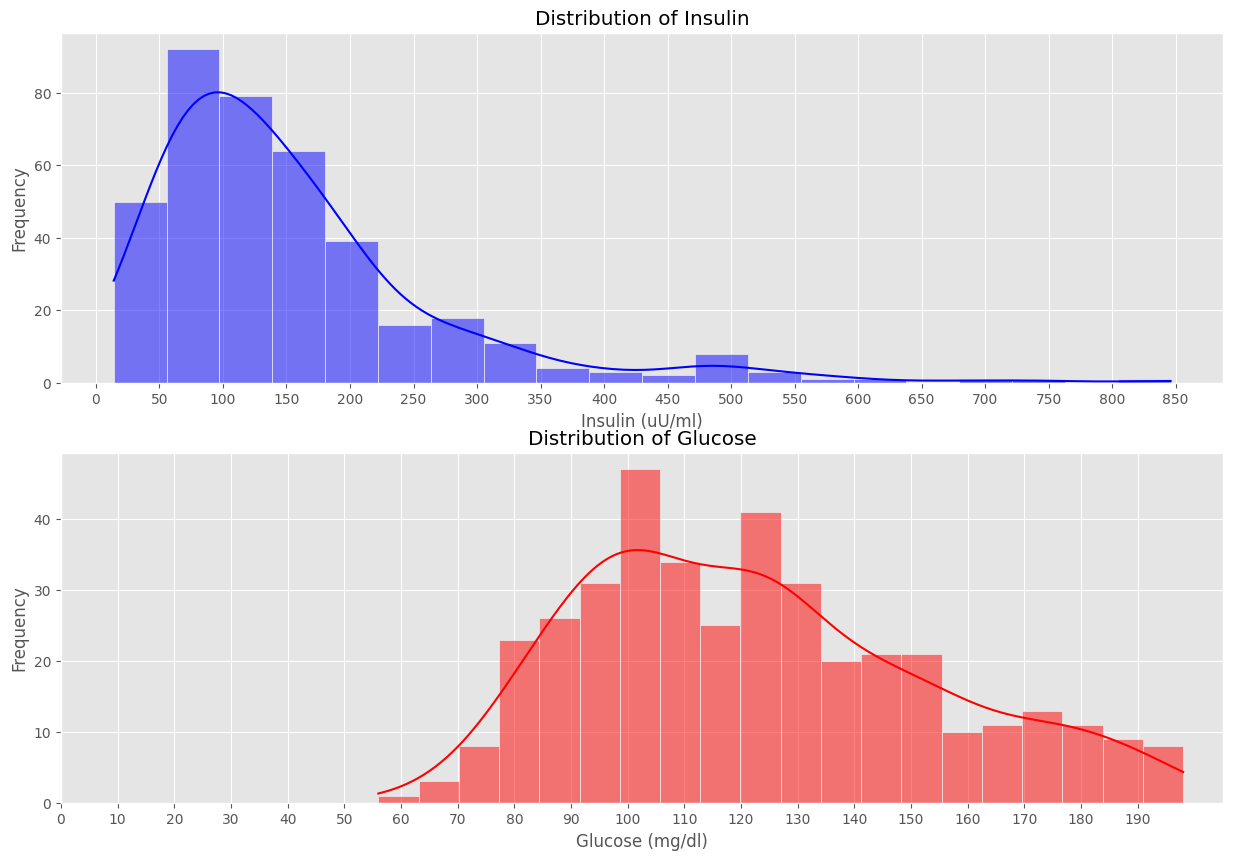

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=df_nan, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50))
sns.histplot(data=df_nan, x="Glucose", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10))
#'DiabetesPedigreeFunction'
plt.show()


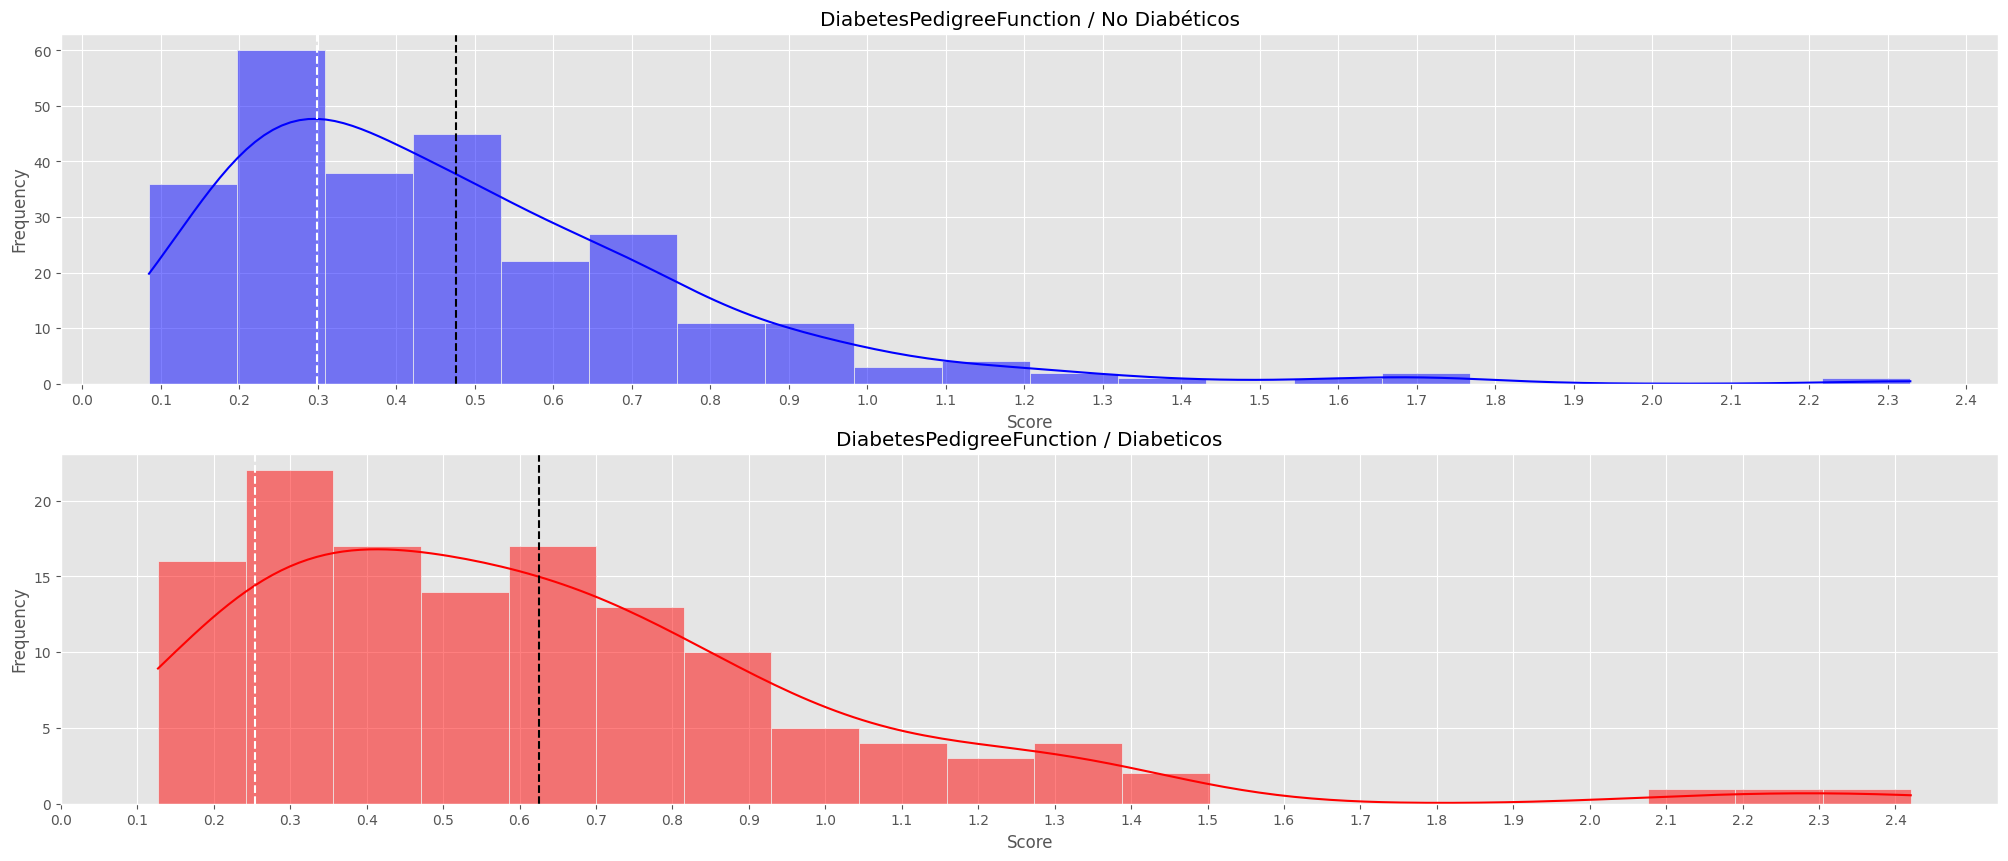

In [38]:
df_no_diabeticos= df_nan[df_nan["Outcome"] == 0] #separo los pacientes no diabeticos
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
sns.histplot(data=df_no_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("DiabetesPedigreeFunction / No Diabéticos")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 2.5, 0.1))
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].mode()[0], color="white", linestyle="--", label="Moda")
sns.histplot(data=df_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("DiabetesPedigreeFunction / Diabeticos")
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 2.5, 0.1))
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].mode()[0], color="white", linestyle="--", label="Moda")
plt.show()

## Diagrama de caja y bigotes para detectar outliers

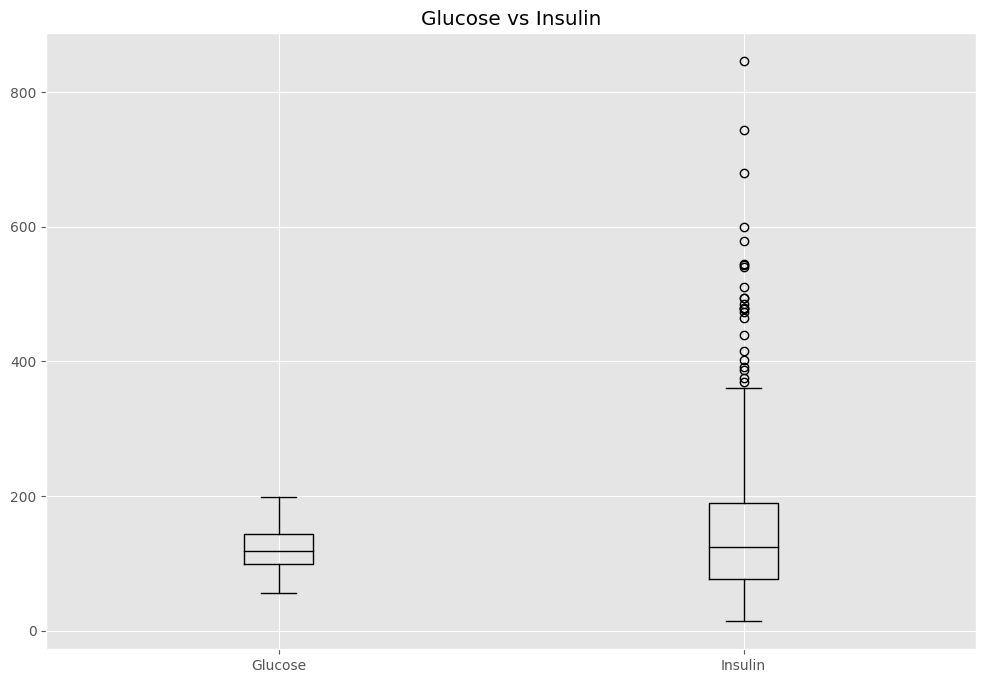

In [39]:
df_nan[['Glucose', 'Insulin']].plot(kind='box', color="k", title='Glucose vs Insulin', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


## Insights preliminares de esta primera entrega



Some dataset descriptions